# Japan Used Cars Price Prediction - Practice Project 5

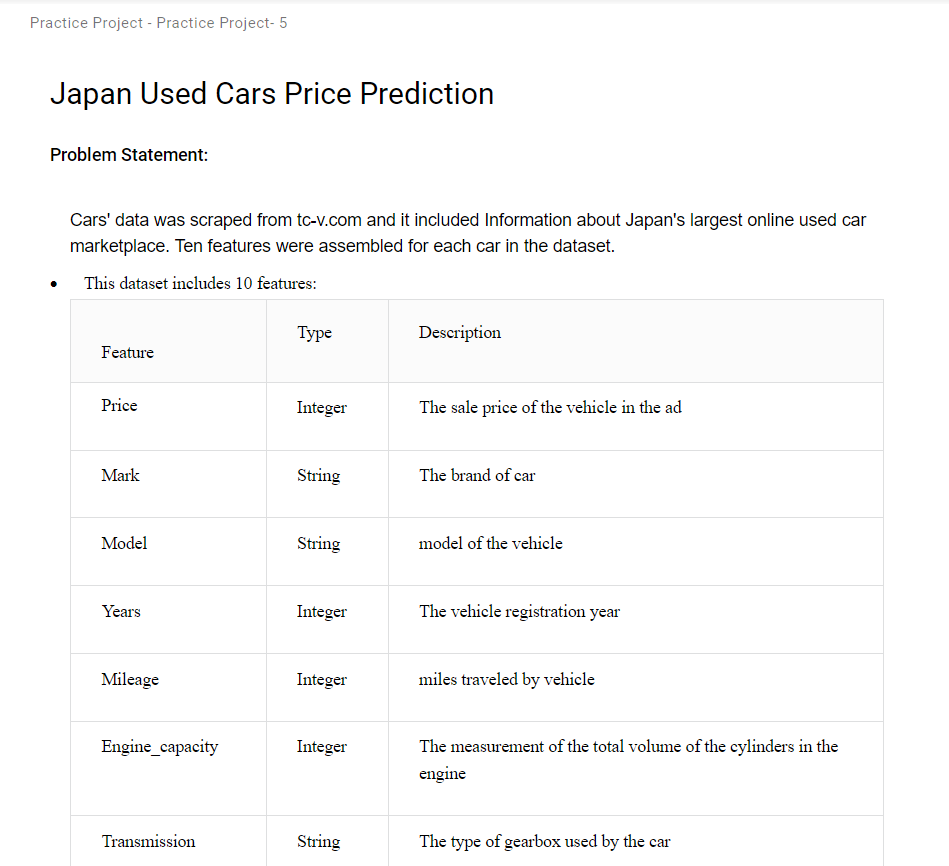

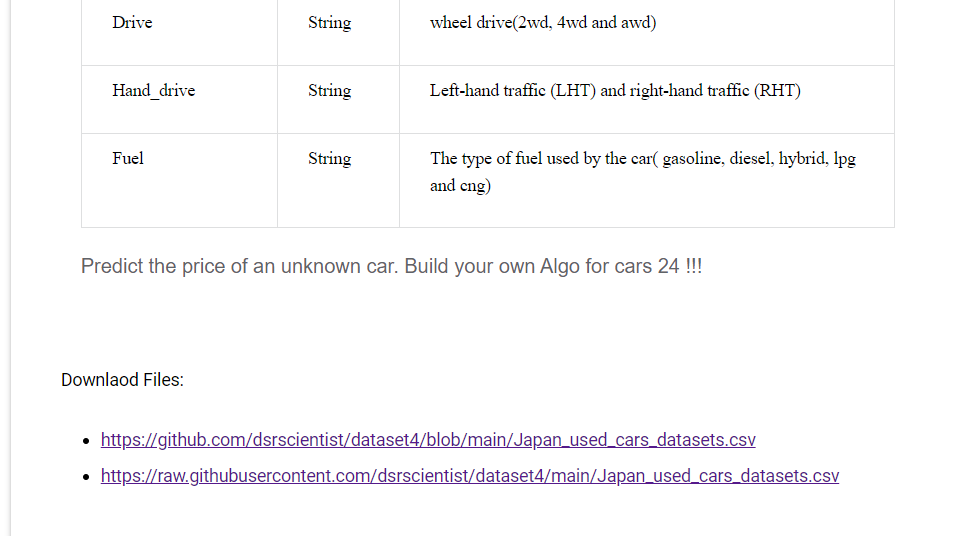

# Importing the Dataset:

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Japan_used_cars_datasets.csv") #reading the data file
df #diplaying the 1st 5 rows and last 5 rows of the dataset

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...,...,...,...
2313,2331,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,2332,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,2333,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,2334,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline


In [4]:
df.shape #The Total number of data (same as df)

(2318, 11)

In [5]:
df.columns #to see the columns names

Index(['id', 'price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

In [6]:
df.head() #to see 5 first row of dataset

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


## Creating new column to find how many years old the car is -Feature Engineering 

In [7]:
df['Current Year']=2022 # creating new column with the current in the same dataset

In [8]:
df.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel,Current Year
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline,2022
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline,2022
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline,2022
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline,2022
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline,2022


In [9]:
df['no_years']=df['Current Year']- df['year']  

# we are deducting the current year column and the year column to a new column no_years

In [10]:
df.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel,Current Year,no_years
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline,2022,19
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline,2022,12
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline,2022,17
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline,2022,14
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline,2022,16


In [11]:
df.drop(['Current Year'],axis=1,inplace=True)  #we are dropping as we have got the data we need 

In [12]:
df.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel,no_years
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline,19
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline,12
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline,17
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline,14
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline,16


In [13]:
df.shape #successfully created new column 

(2318, 12)

# We have created a new column to tell the differnce from  the manufacture year and the current year

## Checking the unique values in the object data columns 

In [14]:
df['mark'].nunique()

28

In [15]:
df['transmission'].nunique()

3

In [16]:
df['drive'].unique()

array(['2wd', '4wd', 'awd'], dtype=object)

In [17]:
df['hand_drive'].unique()

array(['rhd', 'center', 'lhd'], dtype=object)

In [18]:
df['fuel'].unique()

array(['gasoline', 'diesel', 'hybrid', 'lpg', 'cng'], dtype=object)

In [19]:
df['transmission'].unique()

array(['at', 'mt', 'cvt'], dtype=object)

# The reason we do this step is to find out the values in each of the columns as well as to find any unwanted columns with blanks or whitespaces

# Checking for NULL values if any in the data frame

np.nan, None, NaN and others..

In [20]:
df.isnull().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
no_years           0
dtype: int64

We see that there are no NULL values in the data set 

In [21]:
#CAN ALSO USE

print (df.info()) #to check for null Values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2318 non-null   int64 
 1   price            2318 non-null   int64 
 2   mark             2318 non-null   object
 3   model            2318 non-null   object
 4   year             2318 non-null   int64 
 5   mileage          2318 non-null   int64 
 6   engine_capacity  2318 non-null   int64 
 7   transmission     2318 non-null   object
 8   drive            2318 non-null   object
 9   hand_drive       2318 non-null   object
 10  fuel             2318 non-null   object
 11  no_years         2318 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 217.4+ KB
None


# We have rechecked again to conclude no NUll values found in the dataset and we also see the data types in each column , we see price the target is int 

# Check if there are any duplicates Remove if there are any duplicates 

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.shape

(2318, 12)

# Check the datatypes of the columns 

In [29]:
df.dtypes 

id                  int64
price               int64
mark               object
model              object
year                int64
mileage             int64
engine_capacity     int64
transmission       object
drive              object
hand_drive         object
fuel               object
no_years            int64
dtype: object

We can observe that there are in total 6 columns which are Object data i.e :-
  - mark               
  - model 
  - transmission
  - drive 
  - hand_drive
  - fuel
  
We can also observe that the Target variable (Price) is int data and continuos in nature

We have id , year mileage, engine_capacity, no_years all numerical columns 

Therefore , we can conclude from this part that we need to treat categorical data from the dataset.

In [22]:
df['price'].nunique() # we see there are some examples of unique data in the target variable 

354

rechecking for whitespaces

In [31]:
#lets check for the categoriacal data as we will need to treat them 

df['year'].nunique() 

30

In [32]:
df['mileage'].nunique()

1367

In [33]:
df['engine_capacity'].nunique() 

93

Here we see the uniques value total counts in all numerical data , we need to plot as there are too many of them 

In [34]:
#Total no. of unique values in Target Variable 'Charges'
df['price'].nunique()

354

In [35]:
# Checking to see if any of the values in Charges is blank spaces

df.loc[df['price'] == " "]

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel,no_years


We see no whitespaces so lets move on 

# Making a DATAFRAME From the nominal data to treat

In [26]:
df_visualization_nominal=df[['mark','model','transmission','drive','hand_drive','fuel']] # moving the column with nominal data to an object

In [27]:
df_visualization_nominal.columns #checking to see the object columns data

Index(['mark', 'model', 'transmission', 'drive', 'hand_drive', 'fuel'], dtype='object')

Created object to store categorical columns 

# Visualization of the Nominal Data

For the nominal categorical data we will use Countplot as it gives the frequency of the classes of the columns:

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

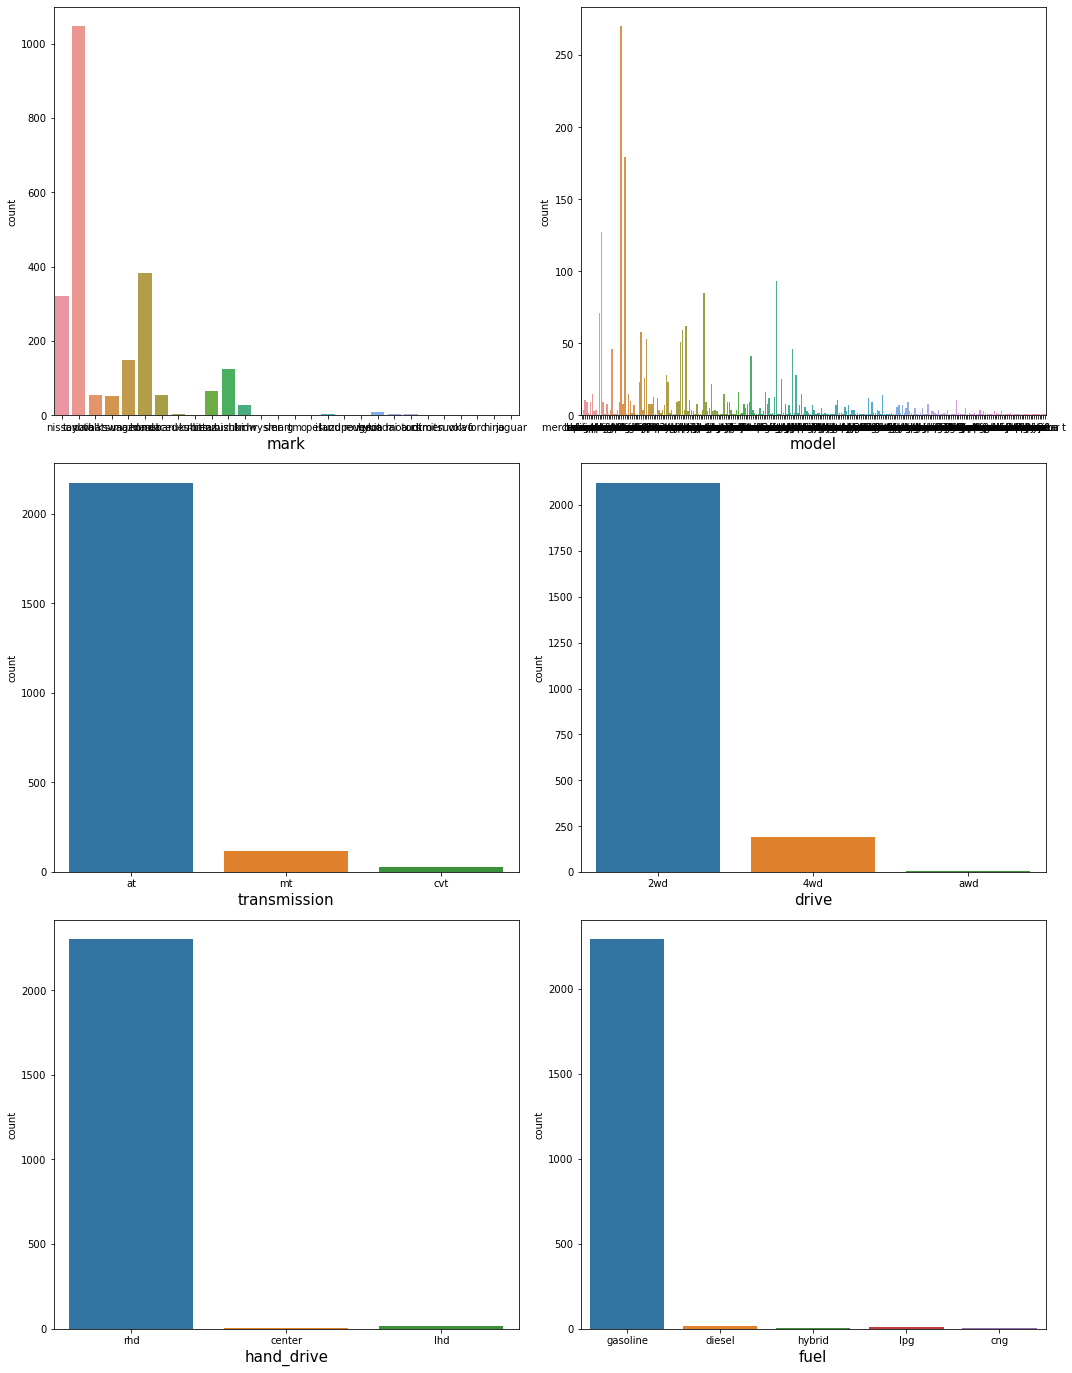

In [41]:
#Lets see how the data is distributed for every column as a whole

plt.figure(figsize =(15,25), facecolor = 'white')
plotnumber = 1

for column in df_visualization_nominal:
    if plotnumber <=6: # as there are 17 columns in data
        ax = plt.subplot(4,2,plotnumber)
        sns.countplot(df_visualization_nominal[column])
        plt.xlabel(column,fontsize = 15)
        
    plotnumber +=1
plt.tight_layout()

In [ ]:
#Lets see the representation individually now with each column

toyota           1047
honda             382
nissan            320
mazda             148
suzuki            126
mitsubishi         65
daihatsu           56
subaru             54
volkswagen         52
bmw                27
hyundai             9
mercedes-benz       5
kia motors          4
isuzu               3
audi                3
smart               2
volvo               2
land rover          2
peugeot             2
hino                1
mitsuoka            1
ford                1
gm                  1
citroen             1
opel                1
chrysler            1
kubota              1
jaguar              1
Name: mark, dtype: int64


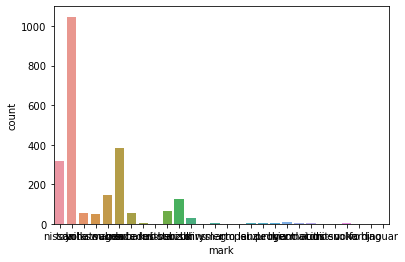

In [42]:

ax = sns.countplot(x='mark',data = df_visualization_nominal)
print(df_visualization_nominal['mark'].value_counts())

From the above observations we can see that there are many brands and toyota is the highest among them , there are brands with one value as well

fit                    270
vitz                   179
passo                  127
ist                     93
ractis                  85
                      ... 
sx4 sedan                1
207                      1
corolla ii               1
impreza sportswagon      1
estima t                 1
Name: model, Length: 258, dtype: int64


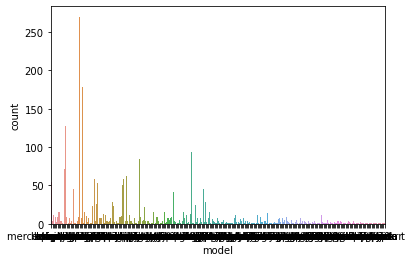

In [43]:
ax = sns.countplot(x='model',data = df_visualization_nominal)
print(df_visualization_nominal['model'].value_counts())

From the above observations we can see there are tto many columns in this feature about 258 , but this is specific to brand , but it does not give us too much info on the price , As per the data we see that there are imbalance in make so having this will not be benficial 

at     2171
mt      117
cvt      30
Name: transmission, dtype: int64


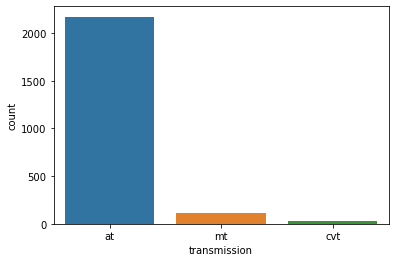

In [44]:
ax = sns.countplot(x='transmission',data = df_visualization_nominal)
print(df_visualization_nominal['transmission'].value_counts())

From the above observations we can see the total number of transmissions and automatic is the highest at 2171, mt is 117 and cvt 30

2wd    2121
4wd     192
awd       5
Name: drive, dtype: int64


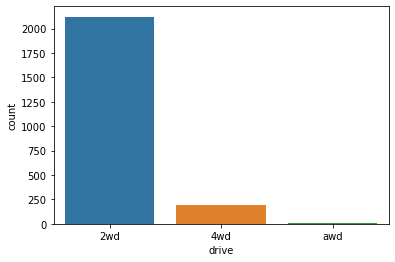

In [45]:
ax = sns.countplot(x='drive',data = df_visualization_nominal)
print(df_visualization_nominal['drive'].value_counts())

From the above diagram we see that the 2wheel drive is highest @ 2121 and 4 wheel is 192 and awd is 5

rhd       2301
lhd         16
center       1
Name: hand_drive, dtype: int64


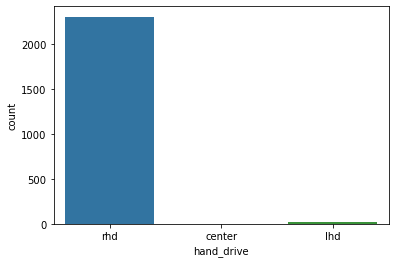

In [46]:
ax = sns.countplot(x='hand_drive',data = df_visualization_nominal)
print(df_visualization_nominal['hand_drive'].value_counts())

We see that in this graph, we see that rhd is the highest, lhd is 16 and center is only 1

gasoline    2290
diesel        18
lpg            7
hybrid         2
cng            1
Name: fuel, dtype: int64


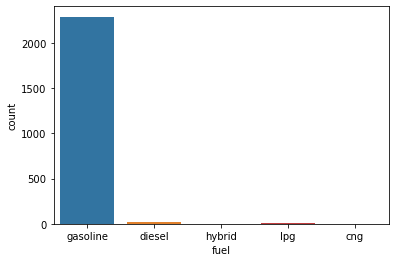

In [47]:
ax = sns.countplot(x='fuel',data = df_visualization_nominal)
print(df_visualization_nominal['fuel'].value_counts())

We see that the majority of count is with gasoline and then we have other which are lpg,hybrid and cng

# Checking the distribution of the continuous value of the float and int columns.

In [48]:
df_visualization_continuous=df[['id' , 'year', 'mileage', 'engine_capacity', 'no_years']].copy()

## Lets graph the continuos and nominal data with distplot 

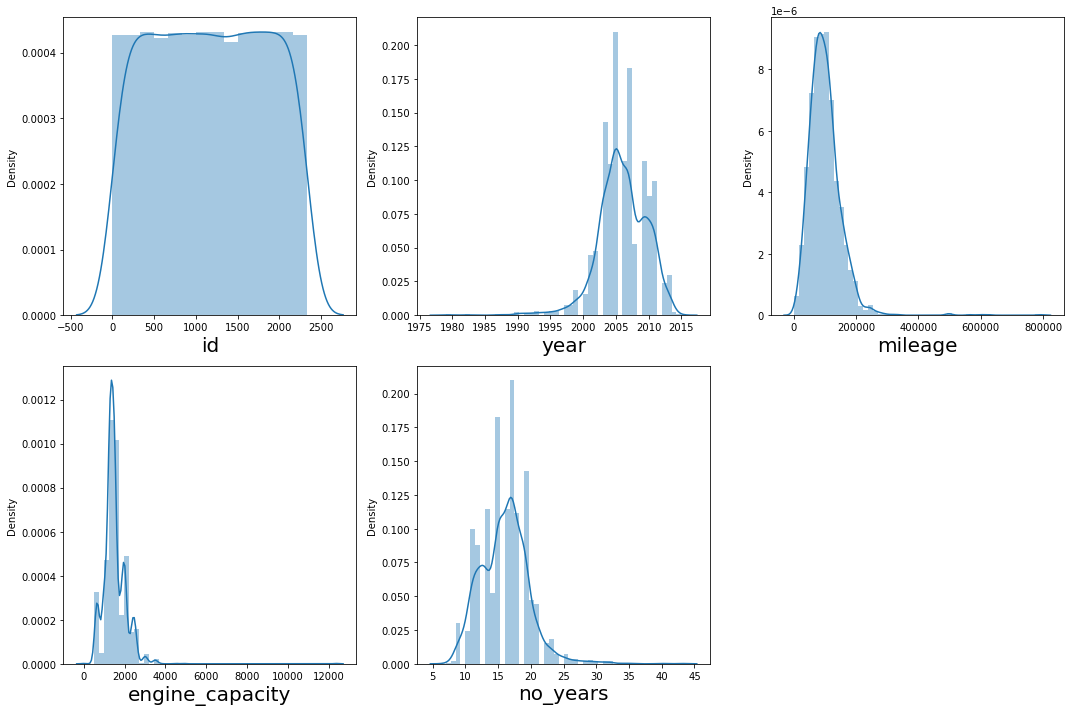

In [49]:
#Lets see how the data is distributed for every column

plt.figure(figsize =(15,10), facecolor = 'white')
plotnumber = 1

for column in df_visualization_continuous:
    if plotnumber <=5:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(df_visualization_continuous[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.tight_layout()

# All the features have a decent normal distribution but we shall see individually now

<AxesSubplot:xlabel='year', ylabel='Density'>

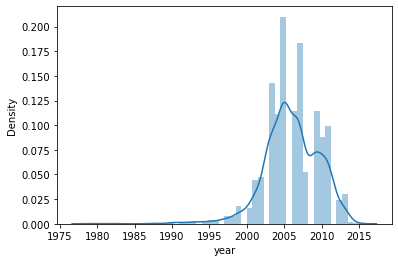

In [51]:
sns.distplot(df_visualization_continuous['year'],kde=True)

We can see that the majority of the year is between 2004 to 2006-2007 and there is some little skewness on the left as we have cars from 1995 and before as well

<AxesSubplot:xlabel='mileage', ylabel='Density'>

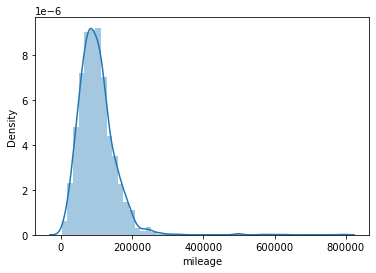

In [52]:
sns.distplot(df_visualization_continuous['mileage'],kde=True)

We can see that the Mileage is evenly distributed.

we see the the max is between 10000 to 15000 and there is littl e skewness towards the right which can be treated with zscore 

<AxesSubplot:xlabel='engine_capacity', ylabel='Density'>

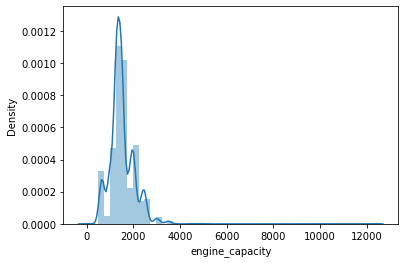

In [53]:
sns.distplot(df_visualization_continuous['engine_capacity'],kde=True)

We see that most of the engine capacity falls between 100 to 2000 and the data is normally distributed , there is little skewness on the right , and need to check for left as its not possible for car to have 0 engine capacity , and we need to eliminate them 

<AxesSubplot:xlabel='no_years', ylabel='Density'>

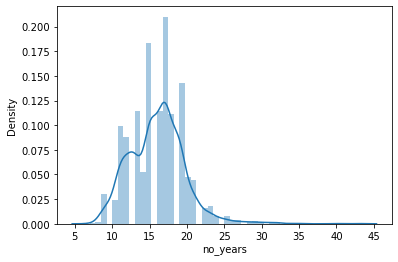

In [54]:
sns.distplot(df_visualization_continuous['no_years'],kde=True)

We see that the max of the data falls  between 15 and 20 years as this is difference between current and year of manufacture

## Since the dataset has a lot of string values. We will use encoding techniques to convert the string data to numerical data 

### Encoding the dataframe with get_dummies  as the values we have are many for make and the rest we have 2-3 values in them , we will drop model as its it make specific and make does not have equal distribution of cars so we dont need it 

In [30]:
#created dummy variables from categories (also can use OneHotEncoder)
df_dummies = pd.get_dummies(df[['mark','model','transmission','drive','hand_drive','fuel']],drop_first=True)

#We used Drop first is to drop one category to reduce the no. of columns as we know that when one is not equal to both its equal to the final column

In [31]:
df_dummies.head()

,mark_bmw,mark_chrysler,mark_citroen,mark_daihatsu,mark_ford,mark_gm,mark_hino,mark_honda,mark_hyundai,mark_isuzu,...,transmission_cvt,transmission_mt,drive_4wd,drive_awd,hand_drive_lhd,hand_drive_rhd,fuel_diesel,fuel_gasoline,fuel_hybrid,fuel_lpg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [32]:
df = df.join(df_dummies)

In [34]:
df.shape

(2318, 306)

In [35]:
df.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,...,transmission_cvt,transmission_mt,drive_4wd,drive_awd,hand_drive_lhd,hand_drive_rhd,fuel_diesel,fuel_gasoline,fuel_hybrid,fuel_lpg
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,...,0,0,0,0,0,1,0,1,0,0
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,...,0,0,0,0,0,1,0,1,0,0
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,...,0,0,0,0,0,1,0,1,0,0
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,...,0,0,0,0,0,1,0,1,0,0
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,...,0,0,0,0,0,1,0,1,0,0


# We have converted the categorical data ana merged the target data nd numerical data and created a new object for the dataset called Get dummies

# EDA

### Describing the Dataset

In [143]:
df.describe()

,id,price,year,mileage,engine_capacity,no_years
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.522433,2005.972390,100013.194996,1507.010785,16.027610
std,674.460724,288.673112,3.698863,52512.478883,549.585170,3.698863
min,0.000000,80.000000,1979.000000,2000.000000,9.000000,7.000000
25%,583.250000,776.000000,2004.000000,67000.000000,1300.000000,13.000000
50%,1168.500000,1000.000000,2006.000000,94000.000000,1490.000000,16.000000
75%,1753.750000,1213.000000,2009.000000,124000.000000,1800.000000,18.000000
max,2335.000000,1400.000000,2015.000000,790000.000000,12340.000000,43.000000


# Visualization of the Data describe func()


<AxesSubplot:>

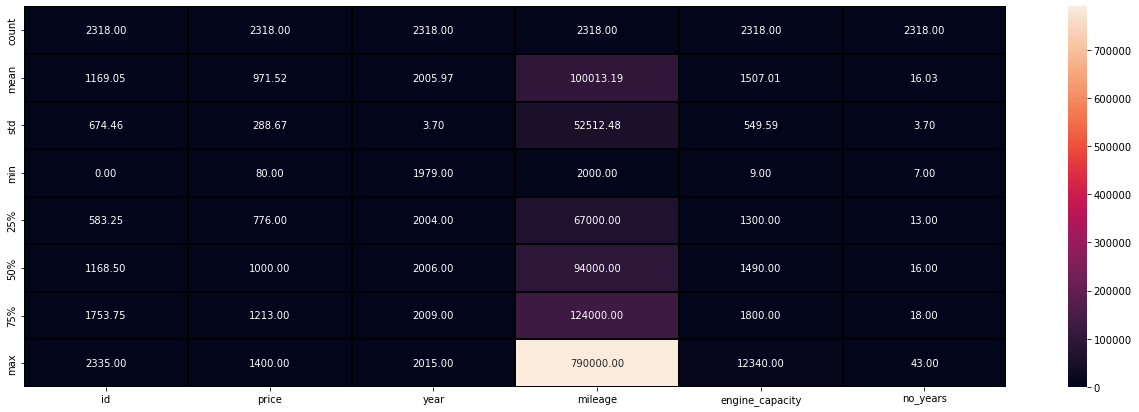

In [64]:
#Lets see how the data is distributed for every column

import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt='0.2f')

We are using the df object here as we have encoded the other columns with categorical data but its a mix of 0 and 1 so we cannot use that as relevent dat for this describe

- in the graph we see the values are normal as in we dont have extreme diff btw the mean and Std 
- we see that engine capacity has min 9 which is too less for a car to have , need to treat as skewness 
- no of years is 43 which feels like an oulier need to check 
- engine capacity has max value as 12340 which is an oulier as well 

# Correlation of the columns with the target Columns

In [144]:
df.corr()['price'].sort_values()

year              -0.211092
mileage            0.021581
engine_capacity    0.173748
no_years           0.211092
id                 0.985100
price              1.000000
Name: price, dtype: float64

## Heatmap of Correlation of the columns within the Columns or Features and Target

<AxesSubplot:>

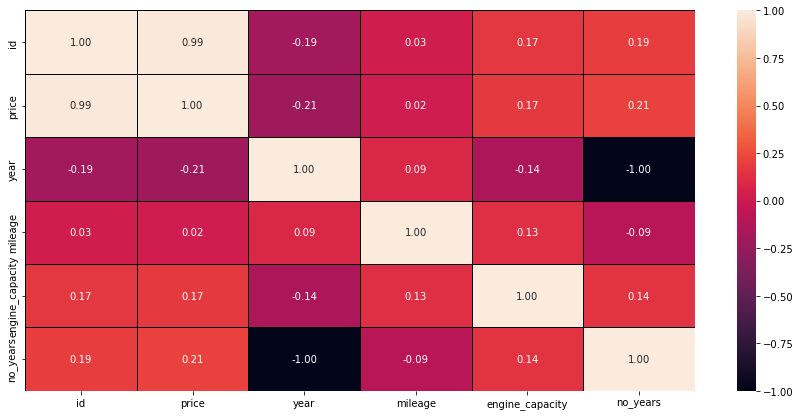

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
#size of canvas
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black', fmt='.2f')

# Again we use df to not have the encoded columns , we see that id is having the highest but we are not using this column as it is like an index which will not give us any valuable insight on the target variable

Apart from that we see that year has no significance in the correlation of the target but the no_years will so we leave that there for now , and will tret that if our model is not doing well.

we also see that there is no multicollinearity between the features

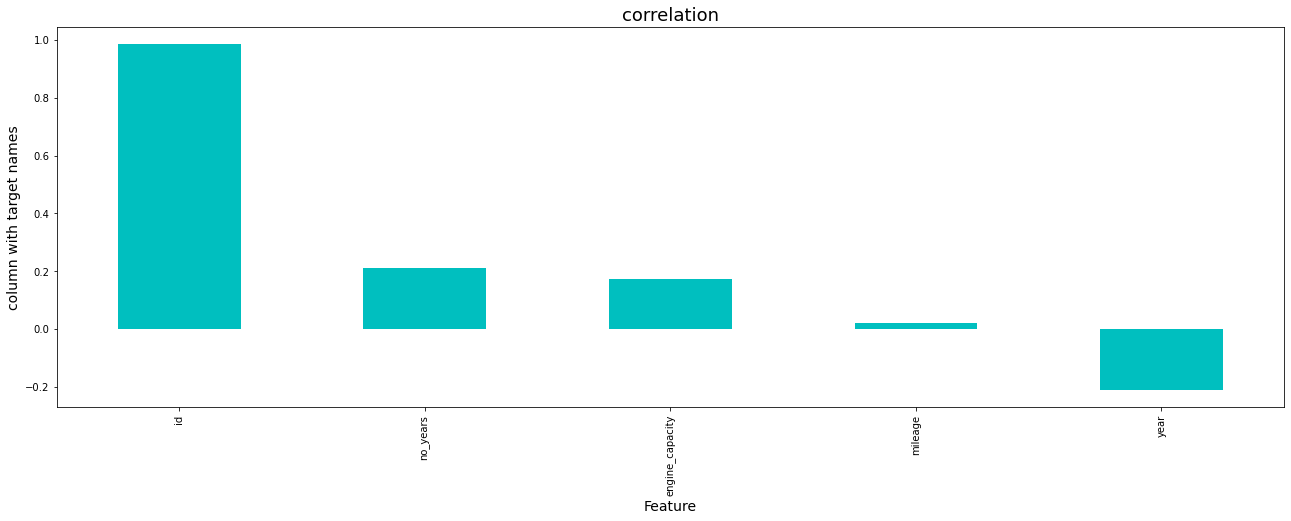

In [145]:
plt.figure(figsize=(22,7))
df.corr()['price'].sort_values(ascending=False).drop(['price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

As we have seen before from the heat map we see that the ID feature is the most correlated with the target variable price , which we will remove

### Lets visualize the relationship between our independent vaiables and the categories

In [36]:
df.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,...,transmission_cvt,transmission_mt,drive_4wd,drive_awd,hand_drive_lhd,hand_drive_rhd,fuel_diesel,fuel_gasoline,fuel_hybrid,fuel_lpg
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,...,0,0,0,0,0,1,0,1,0,0
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,...,0,0,0,0,0,1,0,1,0,0
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,...,0,0,0,0,0,1,0,1,0,0
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,...,0,0,0,0,0,1,0,1,0,0
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,...,0,0,0,0,0,1,0,1,0,0


In [37]:
#Divide data into features and label

x = df.drop(columns = ['price'])
y = df['price']

In [38]:
x #to see x or feature data

,id,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel,...,transmission_cvt,transmission_mt,drive_4wd,drive_awd,hand_drive_lhd,hand_drive_rhd,fuel_diesel,fuel_gasoline,fuel_hybrid,fuel_lpg
0,0,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline,...,0,0,0,0,0,1,0,1,0,0
1,1,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline,...,0,0,0,0,0,1,0,1,0,0
2,2,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline,...,0,0,0,0,0,1,0,1,0,0
3,3,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline,...,0,0,0,0,0,1,0,1,0,0
4,4,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,2331,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline,...,0,0,0,0,0,1,0,1,0,0
2314,2332,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline,...,0,0,0,0,0,1,0,1,0,0
2315,2333,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline,...,1,0,0,0,0,1,0,1,0,0
2316,2334,honda,z,2000,170000,660,at,4wd,rhd,gasoline,...,0,0,1,0,0,1,0,1,0,0


In [39]:
y #to see the target or label data

0         80
1        110
2        165
3        190
4        190
        ... 
2313    1400
2314    1400
2315    1400
2316    1400
2317    1400
Name: price, Length: 2318, dtype: int64

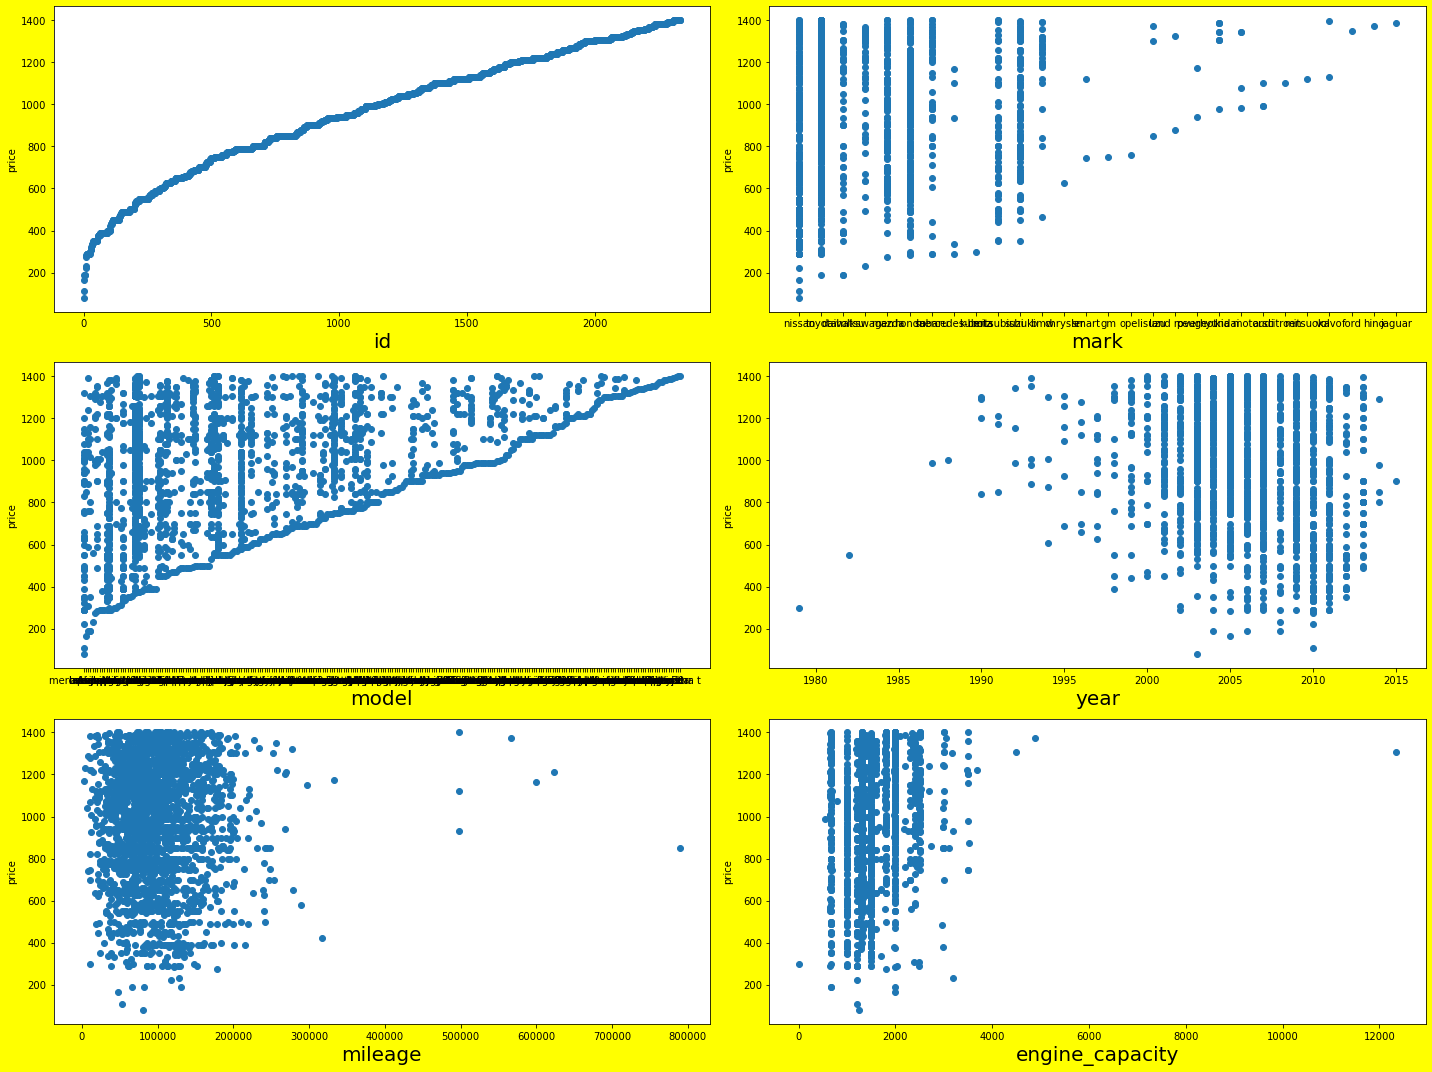

In [41]:
#Lets see how the data is distributed for every column as a whole

#Visualizing Relationship
import matplotlib.pyplot as plt
plt.figure(figsize =(20,15), facecolor = 'yellow')
plotnumber = 1

for column in x:
    if plotnumber <=6:
        ax = plt.subplot(3,2,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('price',fontsize = 10)
    plotnumber +=1
plt.tight_layout()


# From the graph we see:

- postive relationship betwwen id,model and price

- year and no_years show that higher the years lower the price

- more the mileage lesser the price

- we see engine capacity shows values from 100 to 4000 and all the price ranges are within that as well

# NO of years vs the Price

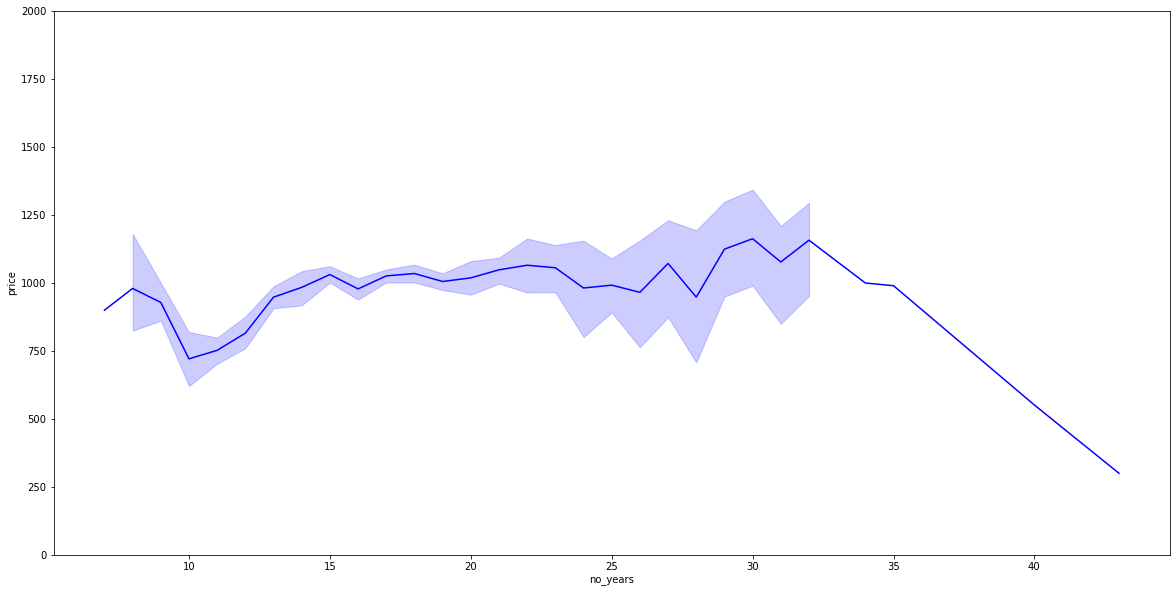

In [153]:
plt.subplots(figsize=(20,10))
sns.lineplot(x='no_years',y='price',data=all_dummies,color='b')
plt.ylim(0,2000)
plt.show()

# As seen before we see that more years the lower the price

# OUTliers Check

In [42]:
# we need to check for skewness of data
df.skew()

C:\Users\Richard Prabhakar\AppData\Local\Temp\ipykernel_14636\2036757108.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


id                 -0.002276
price              -0.466780
year               -0.845917
mileage             3.089142
engine_capacity     4.038892
                     ...    
hand_drive_rhd    -11.555653
fuel_diesel        11.222682
fuel_gasoline      -8.938755
fuel_hybrid        34.022033
fuel_lpg           18.126529
Length: 300, dtype: float64

Keeping +/0.5 as the range for skewness, here are the columns which do not lie within that range

year - continuous (we can treat)

price - target , we should not treat it 

mileage - continuous data we can treat

engine_capacity - continuous we can treat this feature


 we will not treat that as we dont treat categorical or target variable but we will treat the other columns


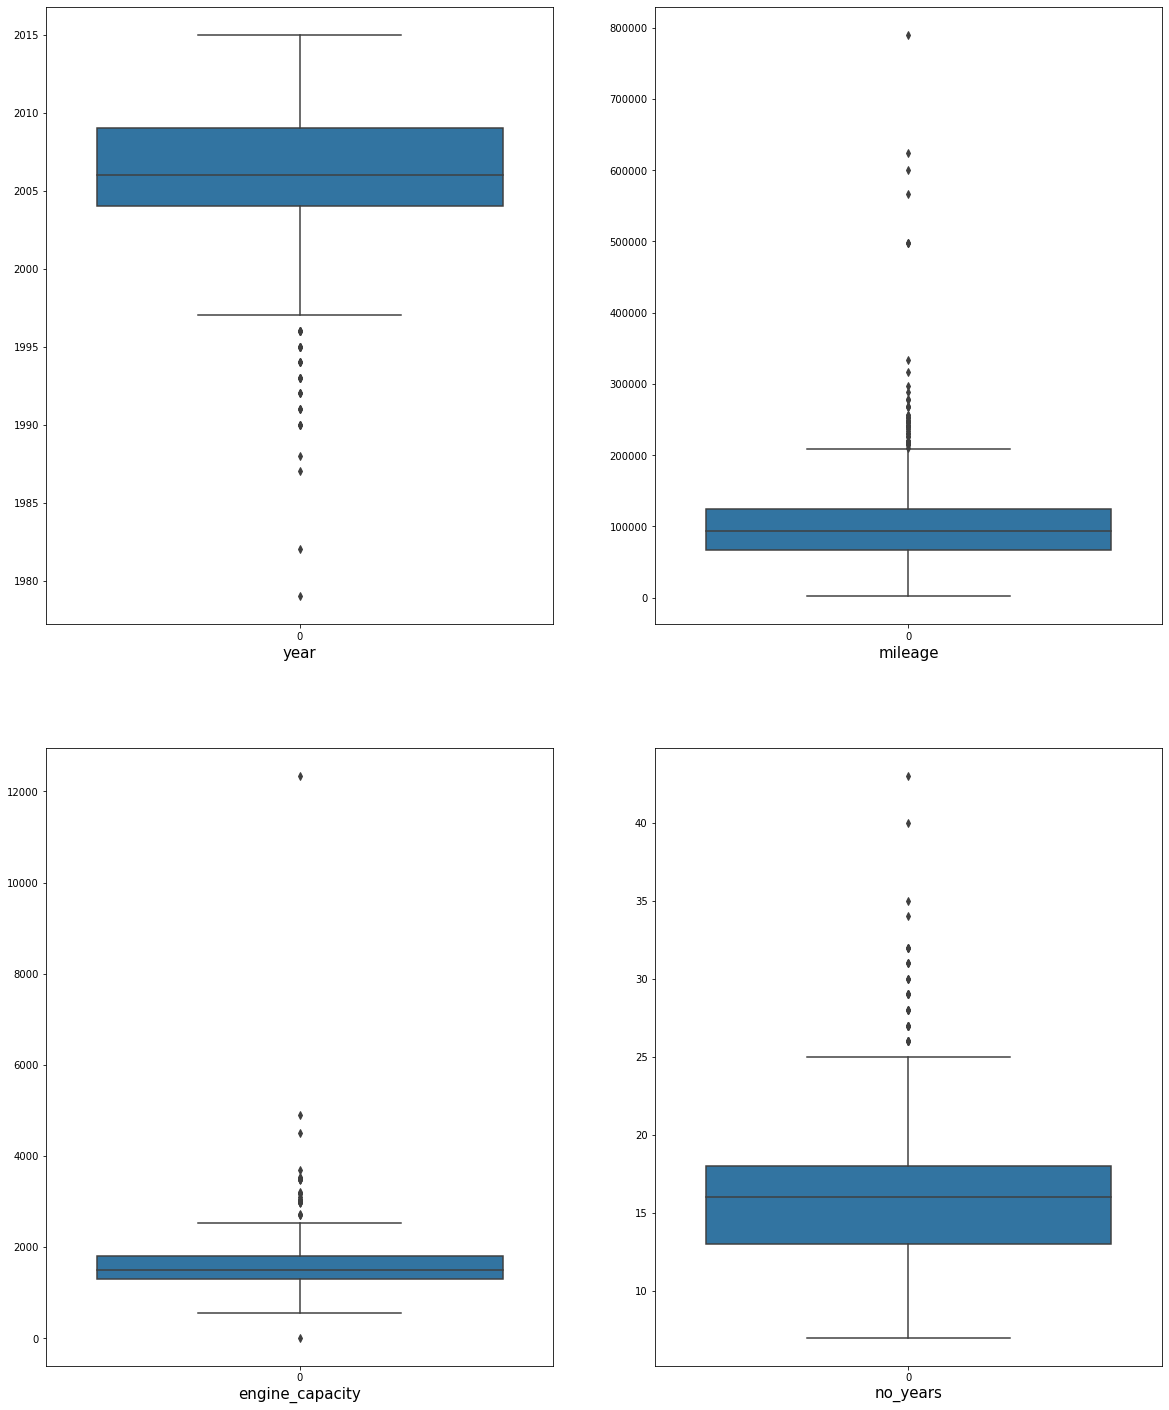

In [155]:
#Lets visualize the data
plt.figure(figsize =(20,25))
graph = 1

for column in x:
    if graph <=4: # as there are 9 columns in data
        plt.subplot(2,2,graph)
        ax=sns.boxplot(data=x[column])
        plt.xlabel(column,fontsize = 15)
        
    graph +=1
plt.show()

year  - continuos, we have outliers we need to treat

mileage - continuos we have outliers to treat

engine_capacity - continuos we have outliers to treat

no_years - continuos we have outliers to treat

 we do not treat the outliers for categorical data as well as the target variable so we only show the numerical 

# Considering the outlier removal with Zscore 

In [47]:
df.shape

(2318, 300)

In [ ]:
df.drop(columns=['mark','model','transmission','drive','hand_drive','fuel'],axis=1,inplace=True)

In [48]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df)) # sbs is absoulte func will convert neg value to positive
z.shape

(2318, 300)

In [49]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,id,price,year,mileage,engine_capacity,no_years,mark_bmw,mark_chrysler,mark_citroen,mark_daihatsu,...,transmission_cvt,transmission_mt,drive_4wd,drive_awd,hand_drive_lhd,hand_drive_rhd,fuel_diesel,fuel_gasoline,fuel_hybrid,fuel_lpg
53,55,370,2008,59484,1290,14,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
57,59,378,2008,115131,1290,14,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
91,93,398,2009,85495,1290,13,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
92,94,399,2009,101620,1300,13,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
108,110,430,2004,119600,1330,18,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,2208,1360,2009,116000,1400,13,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2193,2209,1360,2008,109000,1400,14,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2205,2223,1370,2009,157000,1400,13,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2267,2285,1389,2011,173000,1300,11,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


## We see that the values which are greater that zscore 3 have been removed and we end up with 1970 rows which is lesser than orignal 2318. we need to check for the percentage loss here

In [50]:
df_new_z.shape

(262, 300)

In [ ]:
##Percentage of data loss:

In [51]:
Data_loss = ((2318-262)/2318)*100

In [52]:
Data_loss

88.69715271786023

##### We have see that the data loss is very high @ almost 88.69% so we will take this new data set with less skeweness, now lets plot them to recheck 

D:\DATARAINED\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\DATARAINED\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\DATARAINED\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

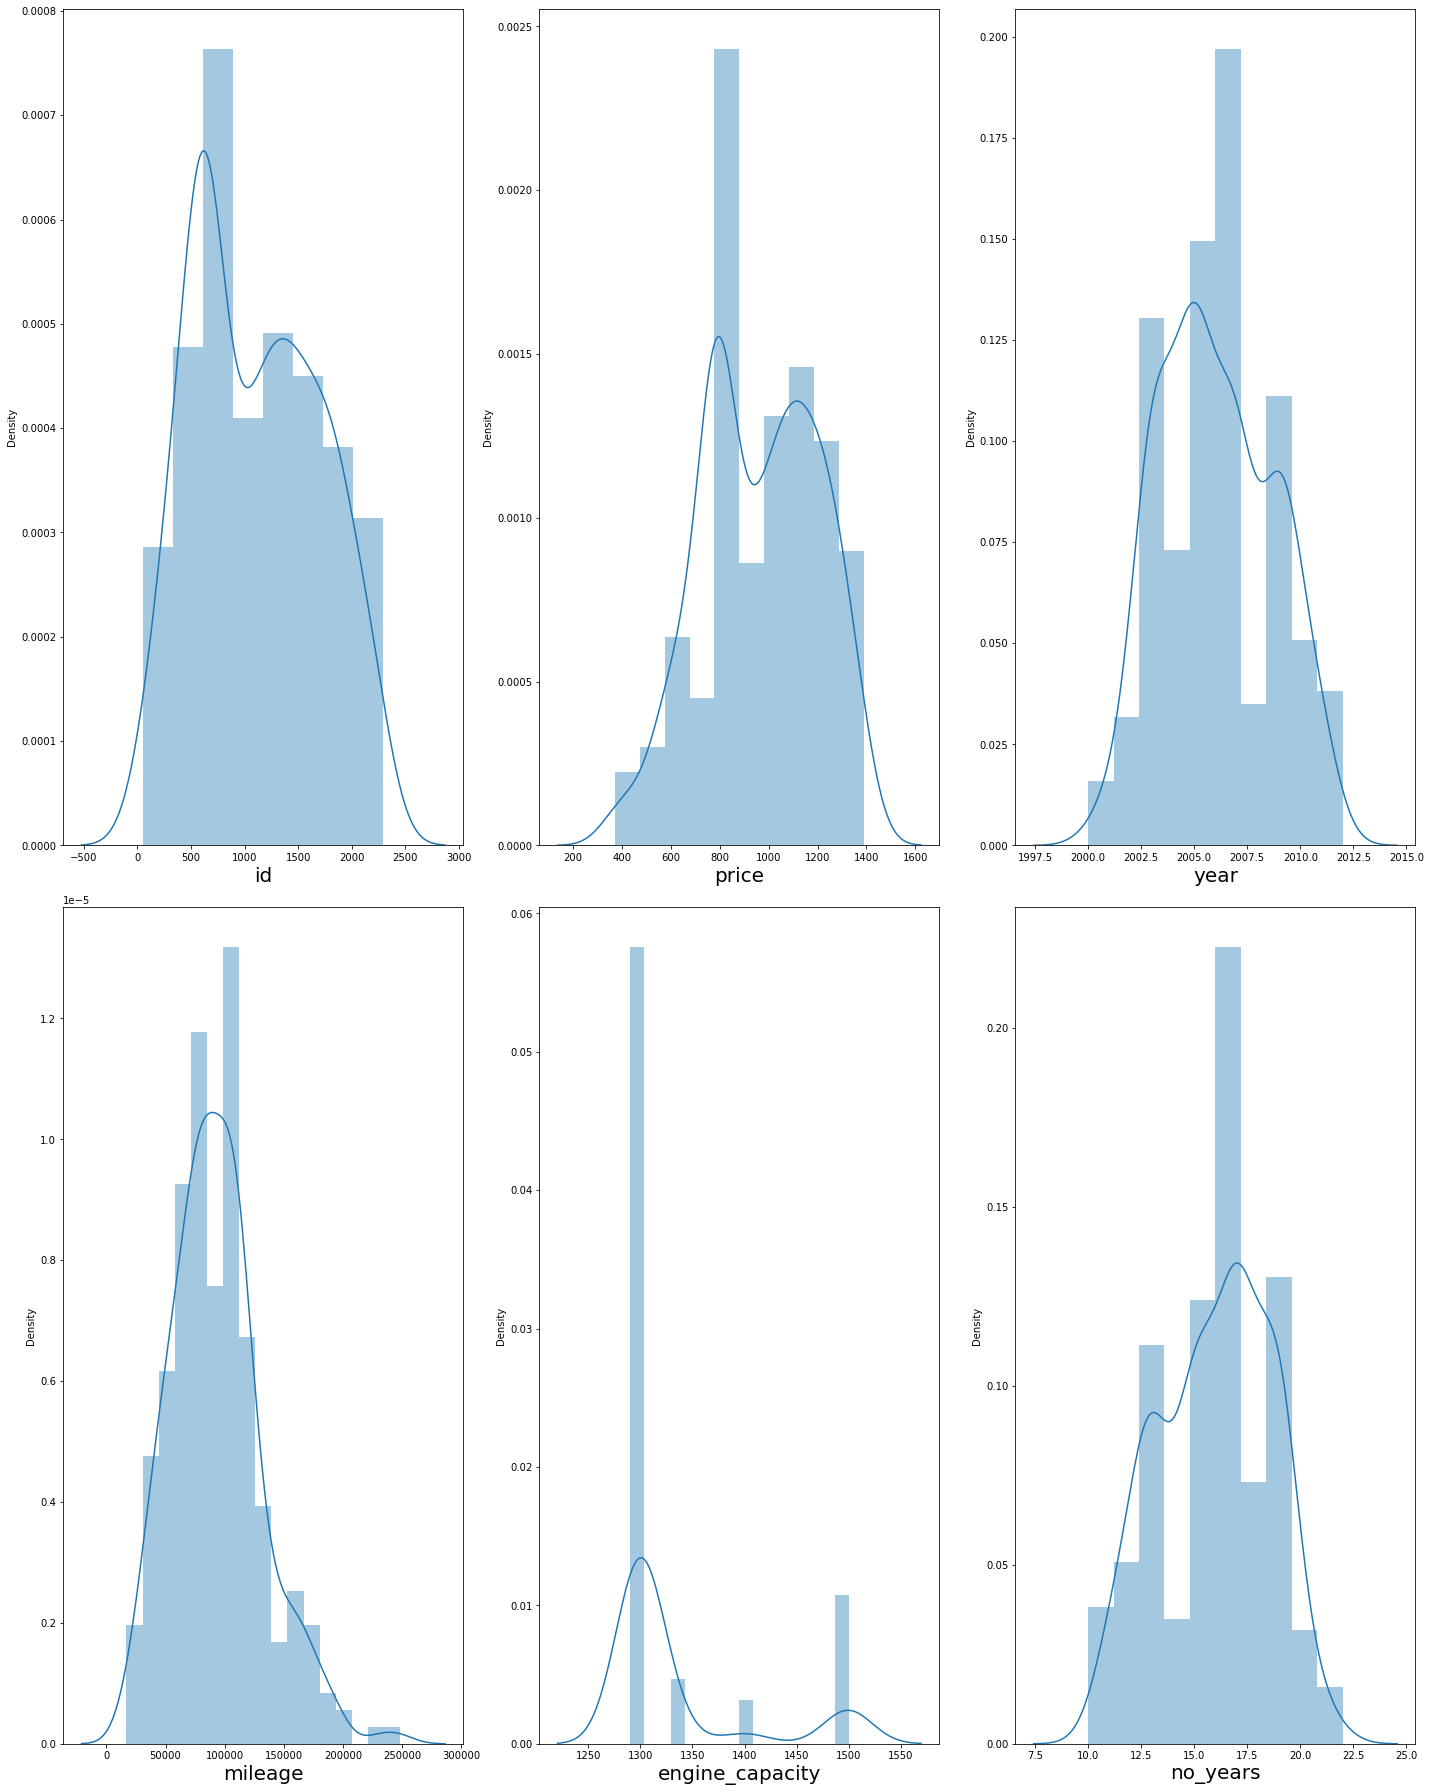

In [54]:
plt.figure(figsize =(20,25), facecolor = 'white')
plotnumber = 1
import seaborn as sns
for column in df_new_z:
    if plotnumber <=6: # as there are 7 columns in data
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(df_new_z[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.tight_layout()

We see that the data has finally become a better normally distributed data as seen here

In [55]:
#lets check the skew one last time

df_new_z.skew()

id                 0.209066
price             -0.171175
year               0.177436
mileage            0.723400
engine_capacity    1.798277
                     ...   
hand_drive_rhd     0.000000
fuel_diesel        0.000000
fuel_gasoline      0.000000
fuel_hybrid        0.000000
fuel_lpg           0.000000
Length: 300, dtype: float64

From the Graph as well as the value we have reduce skewness all the values upto a limit and we see mainly from the first 4 columns as the rest is categorical in nature that the skewnes is reduced

In [56]:
#Divide data into features and label

x = df_new_z.drop(columns = ['price','id'])
y = df_new_z['price']

We see that K best is not the best method of selection as it is not displaying the scores

# Variance Inflation Factor

Checking for Multicollinearity problem to see if one feature is dependent on the other , we need to scale the dat first using MINMAX Scalar

In [57]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [58]:
X_scaled = mms.fit_transform(x)

In [59]:
X_scaled.shape

(262, 298)

In [ ]:
#Finding variance inflation factor in each scaled column i.e X_scaled.shape[1] (1/(1 -R2))

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif["Features"] = x.columns

#chck Values
vif

D:\DATARAINED\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,vif,Features
0,3.909194,year
1,1.063641,mileage
2,1.028091,engine_capacity
3,2.756275,no_years
4,NaN,mark_bmw
...,...,...
293,NaN,hand_drive_rhd
294,NaN,fuel_diesel
295,NaN,fuel_gasoline
296,NaN,fuel_hybrid


We see that the columns year as well as no_years columns are having high multicollinearity , so we need to drop one of them , we wll drop no of years column

In [61]:
#Divide data into features and label

x = df_new_z.drop(columns = ['year','price'])
y = df_new_z['price']

In [62]:
x

,id,mileage,engine_capacity,no_years,mark_bmw,mark_chrysler,mark_citroen,mark_daihatsu,mark_ford,mark_gm,...,transmission_cvt,transmission_mt,drive_4wd,drive_awd,hand_drive_lhd,hand_drive_rhd,fuel_diesel,fuel_gasoline,fuel_hybrid,fuel_lpg
53,55,59484,1290,14,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
57,59,115131,1290,14,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
91,93,85495,1290,13,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
92,94,101620,1300,13,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
108,110,119600,1330,18,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,2208,116000,1400,13,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2193,2209,109000,1400,14,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2205,2223,157000,1400,13,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2267,2285,173000,1300,11,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [63]:
y

53       370
57       378
91       398
92       399
108      430
        ... 
2192    1360
2193    1360
2205    1370
2267    1389
2275    1390
Name: price, Length: 262, dtype: int64

# We have treated Multicollinearity in the dataset moving to model building

# Creating the Model - Choosing the Best Model

# Linear Regression Model

In [64]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
X_scalar = mms.fit_transform(x)
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [65]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X_scalar,y,test_size = 0.25,random_state = i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i},the training accuracy is :-{r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is :-{r2_score(y_test,pred_test)}")
    print('\n')

At random state 0,the training accuracy is :-0.9805532598560137
At random state 0,the testing accuracy is :-0.9840313506562295


At random state 1,the training accuracy is :-0.9820655311404414
At random state 1,the testing accuracy is :-0.9794046725541827


At random state 2,the training accuracy is :-0.979804166418709
At random state 2,the testing accuracy is :-0.9852878492861122


At random state 3,the training accuracy is :-0.9819933300032668
At random state 3,the testing accuracy is :-0.9795029062111641


At random state 4,the training accuracy is :-0.9819106831022545
At random state 4,the testing accuracy is :-0.9795164014989348


At random state 5,the training accuracy is :-0.980499784469245
At random state 5,the testing accuracy is :-0.9831945515371345


At random state 6,the training accuracy is :-0.9804525644008895
At random state 6,the testing accuracy is :-0.9836534374831998


At random state 7,the training accuracy is :-0.9826901816896957
At random state 7,the testing accur

At random state 86,the training accuracy is :-0.981872468659148
At random state 86,the testing accuracy is :-0.9795124528212369


At random state 87,the training accuracy is :-0.9814646495719294
At random state 87,the testing accuracy is :-0.9807052343524189


At random state 88,the training accuracy is :-0.9800052686350533
At random state 88,the testing accuracy is :-0.9846340740660852


At random state 89,the training accuracy is :-0.9826879079875092
At random state 89,the testing accuracy is :-0.9767783815714622


At random state 90,the training accuracy is :-0.9792758675860693
At random state 90,the testing accuracy is :-0.9870719245708018


At random state 91,the training accuracy is :-0.981999675805086
At random state 91,the testing accuracy is :-0.9787495118085364


At random state 92,the training accuracy is :-0.981037024943616
At random state 92,the testing accuracy is :-0.9818469755607983


At random state 93,the training accuracy is :-0.981255607108954
At random state 93,the

We observed that among all the scores we see the ones which are better for our model is where the difference between the training and testing score is the least

so we are choosing random state 39 where traing accuracy is and testing is 98% accuracy with little or minimal differnece.

We also notice that for the most of the scores the testing is more accurate that training which should not be the case as training is always higher score that testing , So we will do cross validation and explore more models as well

### Choosing the state we want to create the model

In [110]:
x_train,x_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=355) #using a random state as the chosen state 39 is giving much lower scores

In [111]:
lr.fit(x_train,y_train)

LinearRegression()

In [112]:
pred_train = lr.predict(x_train) # Training the model 

In [113]:
print(r2_score(y_test,pred_test)) #Checking the R2 score again with the test features and target

-0.9524624511200017


## So we see a difference between the earlier r2 score of 98% and the r2 score is there and it is  very little or less  significant 98% and 95% , So we assume the model is not doing as well as we thought Lets move on to Cross validation to check  for overfitting or underfitting 

# Cross-Validation of the model

In [114]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,X_scalar,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy}and the accuracy for testing is {Test_accuracy}")
    print('\n')

At cross fold2 the cv score is -0.04724783929374787 and accuracy score for training is 0.9819354101289428and the accuracy for testing is -0.9524624511200017


At cross fold3 the cv score is 0.4194343359849797 and accuracy score for training is 0.9819354101289428and the accuracy for testing is -0.9524624511200017


At cross fold4 the cv score is 0.4975590591927939 and accuracy score for training is 0.9819354101289428and the accuracy for testing is -0.9524624511200017


At cross fold5 the cv score is -0.03544208573512231 and accuracy score for training is 0.9819354101289428and the accuracy for testing is -0.9524624511200017


At cross fold6 the cv score is -74.26747013379268 and accuracy score for training is 0.9819354101289428and the accuracy for testing is -0.9524624511200017


At cross fold7 the cv score is -0.4102393225843226 and accuracy score for training is 0.9819354101289428and the accuracy for testing is -0.9524624511200017


At cross fold8 the cv score is -6.157948546412255 and

We observe that the model is not at all performing well , the cv score @ 6 is the only one which is coming somewhat reasonable level @74.26% but all the other states show over fitting and underfitting , 

So we can conclude that the model is  overfitted and also that among the scores cv=6 is the best

Now that we seen that this model is not working well with the data we will move on to other models

# Plotting the linear Regression graph with actual and predicted values comparison

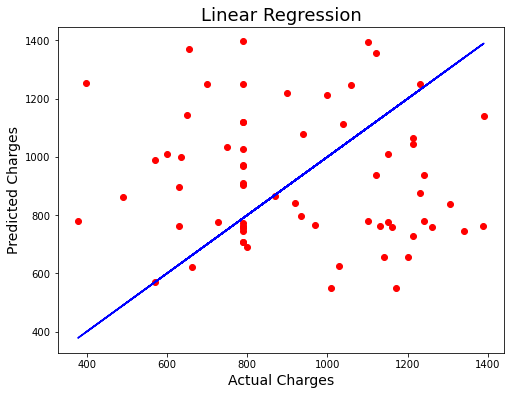

In [115]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.savefig('lr1.png')
plt.show()

# We see that the data is widely scattered and the model is not able to predict at all properly as the difference between the predicted and actual is pretty high

# Regularization

In [116]:
from sklearn.model_selection import GridSearchCV #to select the pest parameters for hyperparameter tuning
from sklearn.model_selection import cross_val_score #to check the difference from the earlier score without hyper parameter tuning

In [117]:
from sklearn.linear_model import Lasso

parameters ={'alpha' : [.0001, .001, .01, .1, 1, 10],
            'random_state' : list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


# Final model training for Linear Regression

In [118]:
ls = Lasso(alpha= 0.1, random_state= 0)
ls.fit(x_train,y_train)
ls_score_training = ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)
ls_score_training*100

98.1918390863538

# We are getting a good lasso score of 98.19% which is a very good score and can help us understand the model is not biased so we will move to other models and further analyze to find the best model

### Now let us use different model to check which is the best one 

# Decision Tree Regressor

In [126]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision =dt.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score :',rfs*100)

dfscore = cross_val_score(dt,X_scalar,y,cv=3)
dfc =dfscore.mean()
print('Cross Val Score :',dfc*100)


R2 Score : 99.83117311980239
Cross Val Score : -92.00514021110061


We observe that for Decision tree regressor 
- there is huge difference between the r2 score  99% and cross val score  -92% 
- we see that the score is lesser than Linear regression model of 98% but the cross val score was-74% which was better


# Random Forest Regressor

In [127]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()

rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision =rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score :',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=3)
rfc =rfscore.mean()
print('Cross Val Score :',rfc*100)


R2 Score : 99.82076601198078
Cross Val Score : -95.1006737081729


We observe that the Random forest Regressor has actually given us a better accuracy score but a worse cross val score
to compare with
- we see that the r2 score is 99.8% which is much higher that linear and decision tree model 98% and 99.7%
- we see there is very very huge difference between the r2 score and cross val score so the model is not good
- highly overfitting and underfitting as well 
- the model  does not work better for this kind of data

# XGboost

In [128]:
import xgboost as xgb
xgb = xgb.XGBRegressor()

xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)
pred_decision =xgb.predict(x_test)

xgbs = r2_score(y_test,pred_decision)
print('R2 Score :',xgbs*100)

xgbscore = cross_val_score(xgb,x,y,cv=5)
xgbc =xgbscore.mean()
print('Cross Val Score :',xgbc*100)


R2 Score : 99.79578181254388
Cross Val Score : -79.53624491059598


We observe that the Xgboost Regressor has actually given us a accuracy score of 99.7% approx 
- we see that the r2 score is 99.7% which is much higher that linear and decision tree model 98% and 99.7% but lower than random forest which is 99.8%
- we see there is mhigh difference between the r2 score and cross val score but less compared to Random forest 
- highly overfitting and underfitting as well but  better than Random forest
- the model is the 2nd best in working best for this kind of data and Linear regression is working the best till now as the accuracy and cross val is closer than the other models

# SVR

In [130]:
from sklearn.svm import SVR
svr = SVR()

svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_decision =svr.predict(x_test)

svrs = r2_score(y_test,pred_decision)
print('R2 Score :',svrs*100)

svrscore = cross_val_score(svr,X_scalar,y,cv=5)
svrc =svrscore.mean()
print('Cross Val Score :',svrc*100)


R2 Score : 5.019761711043602
Cross Val Score : -6503.363943910755


We see that SVR is really not a good model for this data set as the values it is giving is inaccurate and highly not usable as we are getting negative 5% and -6503% on cross val and R2 score we will not consider this model

## So in conclusion we have both Linear Regression and Xgboost to final check to choose the better model

In [151]:
# Linear Regression



lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_decision =lr.predict(x_test)

lrrs = r2_score(y_test,pred_decision)
print('R2 Score :',lrrs*100)

lrrscore = cross_val_score(lr,X_scalar,y,cv=4)
lrrc =lrrscore.mean()
print('Cross Val Score :',lrrc*100)


R2 Score : 97.8039999714803
Cross Val Score : 49.75590591927939


In [155]:
import xgboost as xgb
xgb = xgb.XGBRegressor()

xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)
pred_decision =xgb.predict(x_test)

xgbs = r2_score(y_test,pred_decision)
print('R2 Score :',xgbs*100)

xgbscore = cross_val_score(xgb,x,y,cv=5)
xgbc =xgbscore.mean()
print('Cross Val Score :',xgbc*100)

R2 Score : 99.79578181254388
Cross Val Score : -79.53624491059598


# In the Observations We see that :-
    
    The coss val score in both are really bad and we are getting a huge variation between the Linear re g and Xgboost , but among the two linear regression is the best
    
    We feel that there need to be more feature engineering neede as these models are not able to provide a good model without overfitting the model
    
    the reson could be that most of the car are from similar brand and also the features are have similarity and most of the values in price as well are similar to each other so we are not abkle to trat them accordingly
    
    we also see that the no of data points had been reduced drastically after treating with Zscore for Skewness which could also be a reason. 
    
    All in all we need to have a balanced dataset with variation in target column to be able to predict 

# Hyper parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

#Creating parameters to pass in GridSearchCV

parameters = {'fit_intercept':['True','False'],
             'normalize':['True','False'],
             'copy_X': ['True','False'],
             'n_jobs': ['None',-1],
             'positive' : ['False','True'],
             }
lr = LinearRegression()
clf= GridSearchCV(lr,parameters)   
clf.fit(x_train,y_train)

print(clf.best_params_)

In [175]:
lr=LinearRegression(fit_intercept= True,normalize= False,copy_X=True,n_jobs=-1,positive=True)

lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_decision =lr.predict(x_test)

lrs = r2_score(y_test,pred_decision)
print('R2 Score :',lrs*100)

lrscore = cross_val_score(lr,x,y,cv=4)
lrc =lrscore.mean()
print('Cross Val Score :',lrc*100)


R2 Score : 97.81015781827348
Cross Val Score : 50.09830031736344


### We see that we have increased the cross val score from 49% to  50% and accuracy  scoreis the same  approx to 97.8% now which is a good sign and this model is the best for this project

In [178]:
import pickle
filename = 'Japan_cars.pkl'
pickle.dump(lr,open(filename,'wb'))

# Conclusion

In [179]:
loaded_model = pickle.load(open('Japan_cars.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

97.81015781827348


In [180]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Orignal'])

In [181]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
Predicted,1194.64486,1158.104124,781.609791,544.53084,1150.412645,995.307964,1149.529178,1041.809654,1068.281804,775.172271,...,1024.638016,767.312763,1219.747809,761.39269,681.339799,703.974977,733.892414,767.092411,1142.583669,629.46458
Orignal,1194.64486,1158.104124,781.609791,544.53084,1150.412645,995.307964,1149.529178,1041.809654,1068.281804,775.172271,...,1024.638016,767.312763,1219.747809,761.39269,681.339799,703.974977,733.892414,767.092411,1142.583669,629.46458


### We see that the model has predicted the charges on 66 columns againest the actual charges , But we will need to have more domain knowledge to actaully make the model scalable , Will have to do more work on the data